# 11. 비교

In [2]:
from os.path import basename, exists

In [5]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

from utils import set_pyplot_params
set_pyplot_params()

<br>


## 11.01. 외적 연산

- **`x`의 각 원소와, `y`의 각 원소의 곱을 갖는 배열**

<br>

#### `numpy.meshgrid(x, y)` : 메쉬 그리드 연산, 2개의 수열을 넣으면, 2개의 배열을 반환
- **첫 번째 결과값 : `x`를 행으로 복사, 행의 수는 `y` 길이와 동일**
- **두 번째 결과값 : `y`를 열로 복사, 열의 수는 `x`의 길이와 동일**

In [14]:
x = [1, 3, 5]
y = [2, 4]

In [20]:
import numpy as np
import pandas as pd

In [16]:
X, Y = np.meshgrid(x, y)

In [17]:
X

array([[1, 3, 5],
       [1, 3, 5]])

In [18]:
Y

array([[2, 2, 2],
       [4, 4, 4]])

#### `x`와 `y`의 외적

In [19]:
X * Y

array([[ 2,  6, 10],
       [ 4, 12, 20]])

In [21]:
df = pd.DataFrame(X * Y, columns=x, index=y)
df

,1,3,5
2,2,6,10
4,4,12,20


<br>

#### `meshgrid`를 통한 다른 연산
- **`x`의 각 원소와, `y`의 각 원소의 합을 갖는 배열**

In [23]:
X + Y

array([[3, 5, 7],
       [5, 7, 9]])

- **`x`의 각 원소와, `y`의 각 원소를 비교하는 배열**

In [24]:
X > Y

array([[False,  True,  True],
       [False, False,  True]])

<br>

## 11.02. 신장 예제

**미국의 성인 남성 중 2명 A와 B를 골랐을 때, A와 B보다 크다고 생각이 들 때, A의 키는?**


<br>

> **1. 키에 대한 사전분포를 만들기 위해, 미국 남성의 키에 대한 배경지식 사용**
>
>**2. A와 B의 키에 대한 사전결합분포를 생성**
>
>**3. A가 더 크다는 정보를 사용해서 사전분포를 갱신**
>
>**4. 사후결합분포에서의 A의 키의 사후분포를 가져옴**

<br>

**미국 성인 남성의 평균키는 178cm이고, 표준 편차는 7.7cm이다.**

**키의 분포는 정확히 정규분포를 따르지 않지만, A와 B의 키에 대한 사전분포를 정규분포로 사용**

In [27]:
mean = 178
qs = np.arange(mean-24, mean+24, 0.5)

<br>

#### `scipy.stats.norm(mean, std)` : 평균을 `mean`, 표준쳔차를 `std`를 가지는 정규분포 생성

In [29]:
from scipy.stats import norm

- 정규분포의 확률밀도함수 (PDF)

In [31]:
std = 7.7
ps = norm(mean, std).pdf(qs)

#### 정규분포의 확률밀도함수에 대한 정규화

In [32]:
from empiricaldist import Pmf

In [33]:
prior = Pmf(ps, qs)
prior.normalize()

1.9963309462450582

In [34]:
from utils import decorate

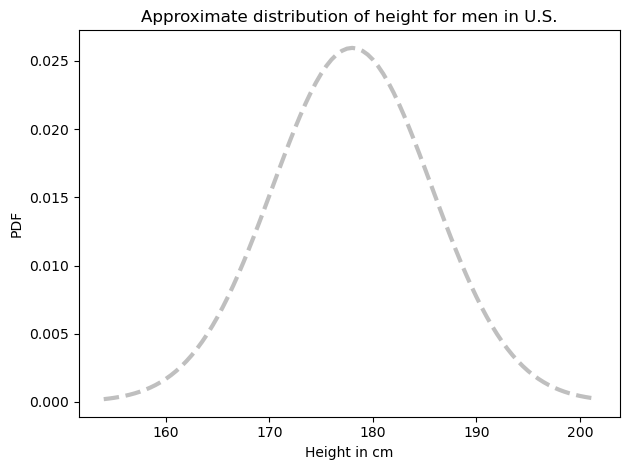

In [35]:
prior.plot(style='--', color='C5')

decorate(xlabel='Height in cm', ylabel='PDF', title='Approximate distribution of height for men in U.S.')

<br>

#### 이 분포는 A가 B의 키에 대한 사전 믿음

<br>

## 11.03. 결합 분포

**모든 쌍에대한 확률을 나타내는 분포인 결합분포는 다음과 같이 표기**

$$P(A_x~\mathrm{and}~B_y)$$

- 이 값은 모든 $x$와 $y$에 대해 A의 키가 $x$cm이고, B의 키가 $y$cm일 확률을 나타냄

<br>

#### 지금까지 알고있는 정보는 'A와 B가 모두 미국 거주 남성이라는 것' 뿐 $\rightarrow$ 이 둘은 서로 독립적
- **즉, A의 키에 대해서 안다고 해도, 이 정보가 B의 키를 파악하는데 어떤 도움도 되지 않음**

    이 경우 결합확률은

$$P(A_x~\mathrm{and}~B_y) = P(A_x)~P(B_y)$$



<br>

#### 각 결합분포는 $x$의 분포 중의 한 원소와 $y$의 분포 중 한 원소 간의 곱

- **따라서 A와 B의 키의 분포를 나타내는 Pmf객체가 있다면, 각 Pmf 확률의 외적을 구함으로써, 결합분포를 생성할 수 있음**

In [38]:
def make_joint(pmf1, pmf2):
    
    """두 Pmf의 외적을 구함"""
    X, Y = np.meshgrid(pmf1, pmf2)
    return pd.DataFrame(X * Y, columns=pmf1.qs, index=pmf2.qs)

**현재, A와 B의 키에대한 사전분포는 동일**

In [39]:
joint = make_joint(prior, prior)
joint.shape

(96, 96)

In [42]:
joint

,154.0,154.5,155.0,155.5,156.0,156.5,157.0,157.5,158.0,158.5,...,197.0,197.5,198.0,198.5,199.0,199.5,200.0,200.5,201.0,201.5
154.0,4.066492e-08,4.968249e-08,6.044433e-08,7.322789e-08,8.834180e-08,1.061267e-07,1.269556e-07,1.512335e-07,1.793960e-07,2.119075e-07,...,2.492578e-07,2.119075e-07,1.793960e-07,1.512335e-07,1.269556e-07,1.061267e-07,8.834180e-08,7.322789e-08,6.044433e-08,4.968249e-08
154.5,4.968249e-08,6.069973e-08,7.384804e-08,8.946639e-08,1.079319e-07,1.296606e-07,1.551084e-07,1.847700e-07,2.191777e-07,2.588987e-07,...,3.045315e-07,2.588987e-07,2.191777e-07,1.847700e-07,1.551084e-07,1.296606e-07,1.079319e-07,8.946639e-08,7.384804e-08,6.069973e-08
155.0,6.044433e-08,7.384804e-08,8.984443e-08,1.088459e-07,1.313112e-07,1.577467e-07,1.887068e-07,2.247934e-07,2.666542e-07,3.149793e-07,...,3.704967e-07,3.149793e-07,2.666542e-07,2.247934e-07,1.887068e-07,1.577467e-07,1.313112e-07,1.088459e-07,8.984443e-08,7.384804e-08
155.5,7.322789e-08,8.946639e-08,1.088459e-07,1.318661e-07,1.590826e-07,1.911091e-07,2.286170e-07,2.723357e-07,3.230498e-07,3.815953e-07,...,4.488543e-07,3.815953e-07,3.230498e-07,2.723357e-07,2.286170e-07,1.911091e-07,1.590826e-07,1.318661e-07,1.088459e-07,8.946639e-08
156.0,8.834180e-08,1.079319e-07,1.313112e-07,1.590826e-07,1.919166e-07,2.305531e-07,2.758026e-07,3.285446e-07,3.897258e-07,4.603549e-07,...,5.414958e-07,4.603549e-07,3.897258e-07,3.285446e-07,2.758026e-07,2.305531e-07,1.919166e-07,1.590826e-07,1.313112e-07,1.079319e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199.5,1.061267e-07,1.296606e-07,1.577467e-07,1.911091e-07,2.305531e-07,2.769680e-07,3.313270e-07,3.946870e-07,4.681852e-07,5.530332e-07,...,6.505094e-07,5.530332e-07,4.681852e-07,3.946870e-07,3.313270e-07,2.769680e-07,2.305531e-07,1.911091e-07,1.577467e-07,1.296606e-07
200.0,8.834180e-08,1.079319e-07,1.313112e-07,1.590826e-07,1.919166e-07,2.305531e-07,2.758026e-07,3.285446e-07,3.897258e-07,4.603549e-07,...,5.414958e-07,4.603549e-07,3.897258e-07,3.285446e-07,2.758026e-07,2.305531e-07,1.919166e-07,1.590826e-07,1.313112e-07,1.079319e-07
200.5,7.322789e-08,8.946639e-08,1.088459e-07,1.318661e-07,1.590826e-07,1.911091e-07,2.286170e-07,2.723357e-07,3.230498e-07,3.815953e-07,...,4.488543e-07,3.815953e-07,3.230498e-07,2.723357e-07,2.286170e-07,1.911091e-07,1.590826e-07,1.318661e-07,1.088459e-07,8.946639e-08
201.0,6.044433e-08,7.384804e-08,8.984443e-08,1.088459e-07,1.313112e-07,1.577467e-07,1.887068e-07,2.247934e-07,2.666542e-07,3.149793e-07,...,3.704967e-07,3.149793e-07,2.666542e-07,2.247934e-07,1.887068e-07,1.577467e-07,1.313112e-07,1.088459e-07,8.984443e-08,7.384804e-08


#### 사전분포가 정규화되어있다면, 사전결합분포도 정규화 되어 있음

In [45]:
joint.to_numpy().sum()

1.0

In [43]:
series = joint.sum()
series.shape

(96,)

<br>

## 11.04. 결합분포 시각화

In [46]:
import matplotlib.pyplot as plt

In [47]:
def plot_joint(joint, cmap='Blues'):
    
    """pcolormesh를 사용하여 결합분포를 시각화"""
    vmax = joint.to_numpy().max() * 1.1
    plt.pcolormesh(joint.columns, joint.index, joint, 
                   cmap=cmap,
                   vmax=vmax,
                   shading='nearest')
    plt.colorbar()
    
    decorate(xlabel='A height in cm', ylabel='B height in cm')

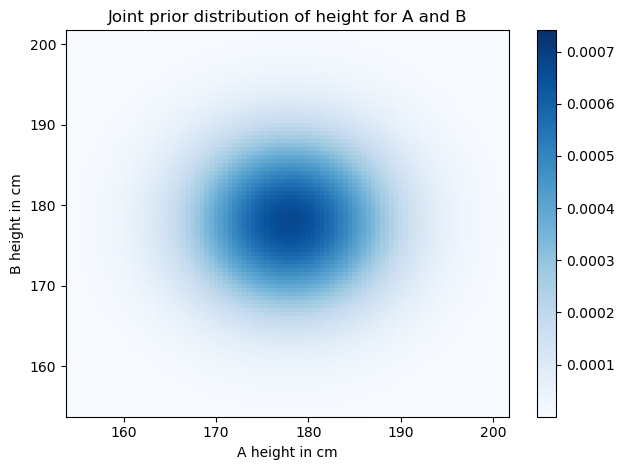

In [51]:
plot_joint(joint)
decorate(title='Joint prior distribution of height for A and B')

#### 확률은 평균 키 부근에서 가장 높고, 평균에서 멀어질 수록 낮아짐

<br>

#### 결합분포를 등고선 형태로 표현

In [52]:
def plot_contour(joint):
    """결합분포를 등고선 그래프화"""
    plt.contour(joint.columns, joint.index, joint, linewidths=2)
    decorate(xlabel='A height in cm', ylabel='B height in cm')

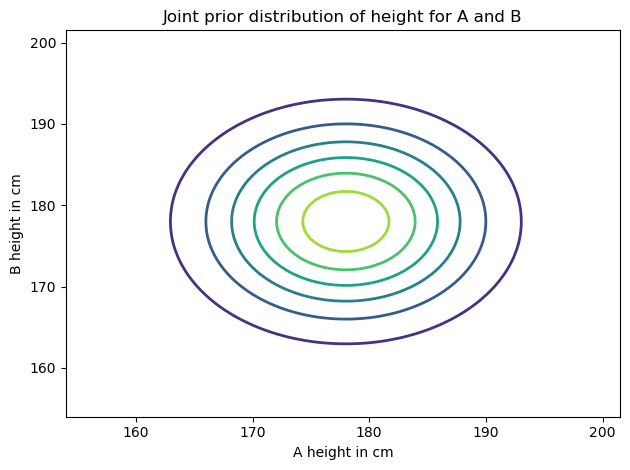

In [53]:
plot_contour(joint)
decorate(title='Joint prior distribution of height for A and B')

<br>

## 11.05. 가능도

#### **결합분포의 각 원소는 A와 B의 키에 대한 가설을 나타냄**

<br>

#### **키에 대한 모든 쌍의 가능도를 구하려면, 사전분포에서 행과 열의 이름을 추출**

In [54]:
x = joint.columns
y = joint.index

#### 메쉬 그리드 생성

In [55]:
X, Y = np.meshgrid(x, y)

- `X`에는 A의 가능한 키의 값인 `x`의 값이,`Y`에는 B의 가능한 키의 값인 `y`의 값이 복사되어 들어감

In [62]:
X, Y

(array([[154. , 154.5, 155. , ..., 200.5, 201. , 201.5],
        [154. , 154.5, 155. , ..., 200.5, 201. , 201.5],
        [154. , 154.5, 155. , ..., 200.5, 201. , 201.5],
        ...,
        [154. , 154.5, 155. , ..., 200.5, 201. , 201.5],
        [154. , 154.5, 155. , ..., 200.5, 201. , 201.5],
        [154. , 154.5, 155. , ..., 200.5, 201. , 201.5]]),
 array([[154. , 154. , 154. , ..., 154. , 154. , 154. ],
        [154.5, 154.5, 154.5, ..., 154.5, 154.5, 154.5],
        [155. , 155. , 155. , ..., 155. , 155. , 155. ],
        ...,
        [200.5, 200.5, 200.5, ..., 200.5, 200.5, 200.5],
        [201. , 201. , 201. , ..., 201. , 201. , 201. ],
        [201.5, 201.5, 201.5, ..., 201.5, 201.5, 201.5]]))

In [63]:
A_taller = (X > Y)

A_taller

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

#### A가 B보다 클때는 1, 그렇지 않은 값에는 0이 되는 배열을 통하여, 가능도를 계산

In [68]:
a = np.where(A_taller, 1, 0)
likelihood = pd.DataFrame(a, index=x, columns=y)

likelihood

,154.0,154.5,155.0,155.5,156.0,156.5,157.0,157.5,158.0,158.5,...,197.0,197.5,198.0,198.5,199.0,199.5,200.0,200.5,201.0,201.5
154.0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
154.5,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
155.0,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
155.5,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
156.0,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
200.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
200.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
201.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


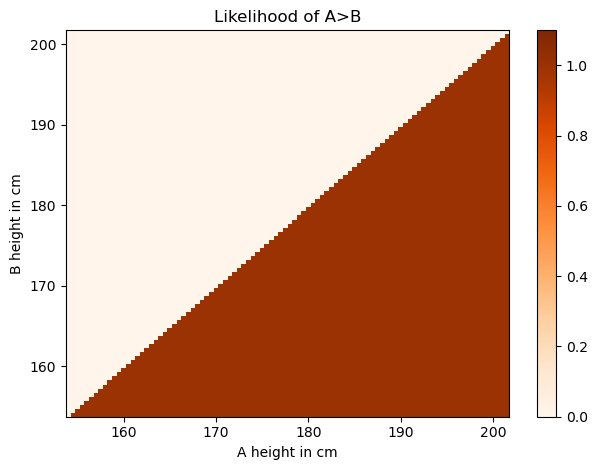

In [69]:
plot_joint(likelihood, cmap='Oranges')
decorate(title='Likelihood of A>B')

<br>

## 11.06. 갱신

#### 정규화되지 않은 사후분포는, 사전분포와 가능도의 곱

In [70]:
posterior = joint * likelihood

In [71]:
def normalize(joint):
    """결합분포의 정규화"""
    prob_data = joint.to_numpy().sum()
    joint /= prob_data
    return prob_data

In [72]:
normalize(posterior)

0.49080747821526977

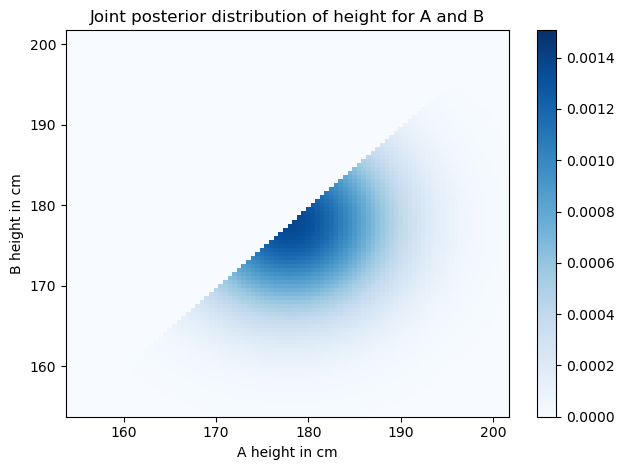

In [74]:
plot_joint(posterior)
decorate(title='Joint posterior distribution of height for A and B')

<br>

## 11.07. 주변분포


### 결합분포로부터, 단일 변수의 분포를 가져오는 경우, 이 결과를 주변분포 (marginal distribution)

<br>

#### 사후결합분포는 주어진 사전분포와 A가 더 크다는 정보하에서, A와 B의 키에 대한 믿음이 어떤지를 보여줌

#### 이 결합분포로부터 A와 B의 사후분포를 계산

<br>

#### A의 키가 180cm일 확률 계산
- **결합분포에서 x=180인 열을 선택 $\rightarrow$ $x=180$일 때의 모든 경우에 대한 사후확률값**

    **$\rightarrow$ 이 값을 다 더하면, A의 키가 180cm일 때의 총 확률**

In [78]:
column = posterior[180]
column.head()

154.0    0.000010
154.5    0.000013
155.0    0.000015
155.5    0.000019
156.0    0.000022
Name: 180.0, dtype: float64

- 대략 3%

In [79]:
column.sum()

0.03017221271570807

<br>

#### A의 사후확률분포를 계산 $\rightarrow$ 각 열을 모두 더함

In [81]:
column_sums = posterior.sum(axis=0)
column_sums.head()

154.0    0.000000e+00
154.5    1.012260e-07
155.0    2.736152e-07
155.5    5.532519e-07
156.0    9.915650e-07
dtype: float64

- **A의 키의 분포 (A의 주변분포)**

In [84]:
marginal_A = Pmf(column_sums)

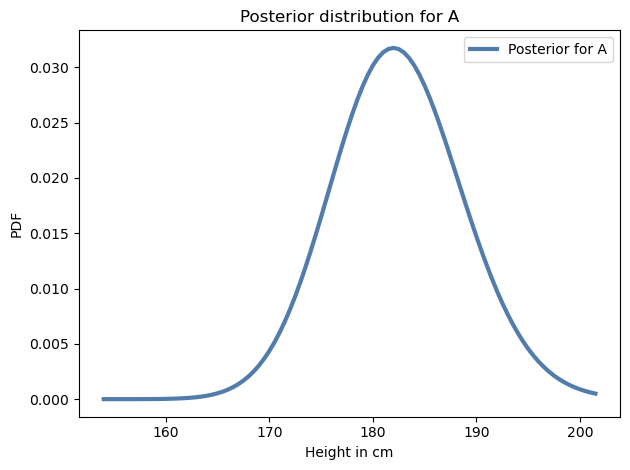

In [85]:
marginal_A.plot(label='Posterior for A')

decorate(xlabel='Height in cm', ylabel='PDF', title='Posterior distribution for A')

<br>

- **B의 키의 분포 (B의 주변분포)**

In [86]:
row_sums = posterior.sum(axis=1)
marginal_B = Pmf(row_sums)

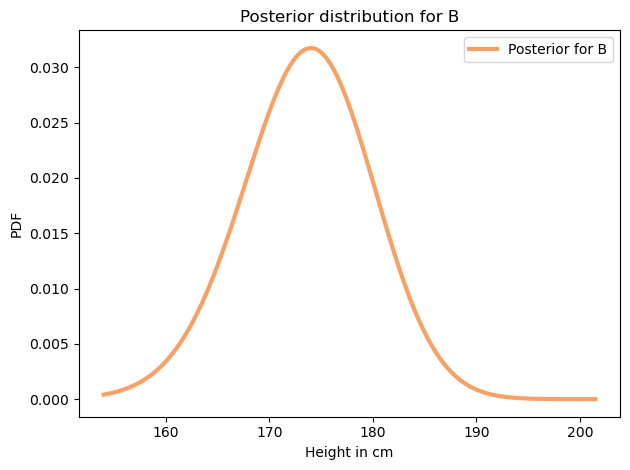

In [87]:
marginal_B.plot(label='Posterior for B', color='C1')

decorate(xlabel='Height in cm', ylabel='PDF', title='Posterior distribution for B')

<br>

**주변분포 계산 함수**
* `axis=0`, 첫 번째 인자 ($x$축 기준)의 주변분포 계산

* `axis=1`, 두 번째 인자 ($y$축 기준)의 주변분포 계산

In [117]:
def marginal(joint, axis):
    """주변분포 계산"""
    return Pmf(joint.sum(axis=axis))

In [42]:
marginal_A = marginal(posterior, axis=0)
marginal_B = marginal(posterior, axis=1)

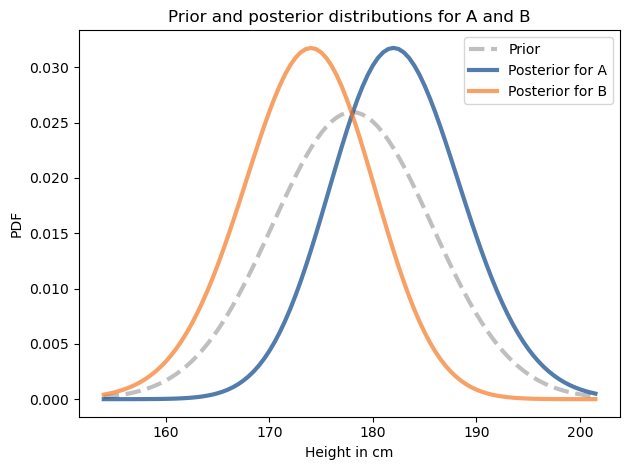

In [88]:
prior.plot(style='--', label='Prior', color='C5')
marginal_A.plot(label='Posterior for A')
marginal_B.plot(label='Posterior for B')

decorate(xlabel='Height in cm', ylabel='PDF', title='Prior and posterior distributions for A and B')

<br>

#### A의 사후분포는 우측으로, B의 사후분포는 좌측으로 이동

<br>

#### 사후평균과 각 주변분포의 평균
- **A가 B보다 크다는 관측결과를 기반으로, A는 평균보다 조금 더 크고, B는 조금 작다고 믿게 됨**


In [89]:
prior.mean()

177.99516026921506

In [90]:
print(marginal_A.mean(), marginal_B.mean())

182.3872812342168 173.6028600023339



<br>

표준편차 확인

In [92]:
prior.std()

7.624924796641578

In [93]:
print(marginal_A.std(), marginal_B.std())

6.270461177645469 6.280513548175111


#### 사후분포의 표준편차가 좀 더 작으므로, A와 B의 키를 비교한 결과를 안 후, 둘의 키에 대해 조금더 확신이 증가

<br>

## 11.08. 사후조건부확률

#### A의 키를 잰 후 키가 170cm임을 알게 되었을 때

In [97]:
column_170 = posterior[170]

- B의 가능한 키와, 이 키에 해당하는 가능도를 정규화

In [98]:
cond_B = Pmf(column_170)
cond_B.normalize()

1.0

<br>

#### A의 키가 170cm라는 정보가 주어졌을 때, B의 키에 대한 조건부확률분포

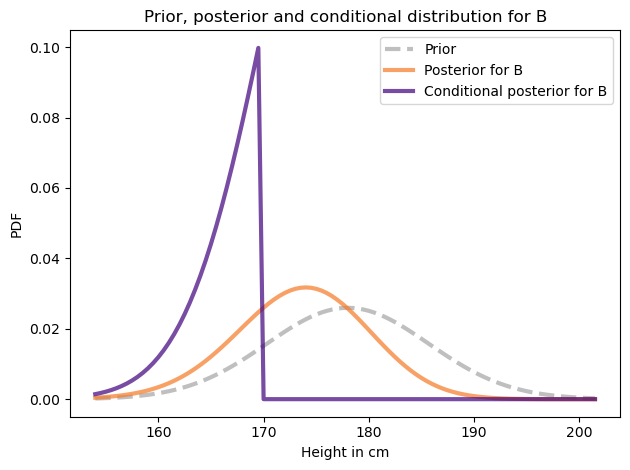

In [99]:
prior.plot(style='--', label='Prior', color='C5')
marginal_B.plot(label='Posterior for B', color='C1')
cond_B.plot(label='Conditional posterior for B', color='C4')

decorate(xlabel='Height in cm', ylabel='PDF', title='Prior, posterior and conditional distribution for B')

#### B가 A보다 작고, A가 170cm라는 사실을 확실히 알고 있기에 $\rightarrow$ 사후조건부확률분포는 170cm에서 절단 

<br>

## 11.09. 의존성과 독립성

**사전결합분포를 만들때, A와 B의 키는 독립적 $\rightarrow$ $P(A_x|B_y)$는 조건부확률이 아닌 $P(A_x)$와 동일**

<br>

#### **하지만 사후분포의 경우, A와 B는 독립적이지 않음**

- **A가 B보다 크다는 사실과, A의 키가 얼마인지 안다는 것은 B의 키에 대한 정보**

<br>

### B가 180cm라고 했을 때, A의 사후조건부확률분포

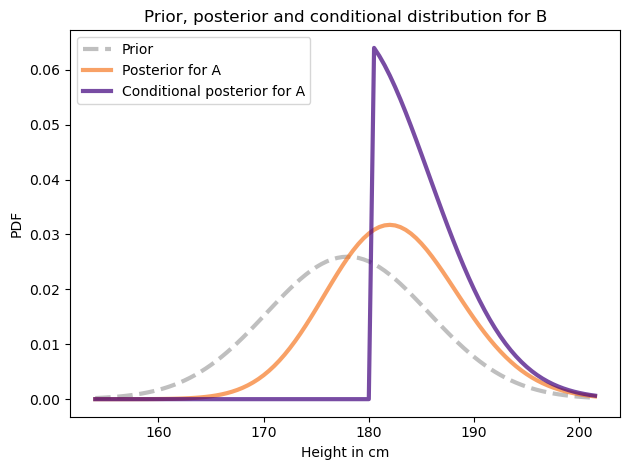

In [104]:
column_180 = posterior.loc[180]

cond_A = Pmf(column_180)
cond_A.normalize()

prior.plot(style='--', label='Prior', color='C5')
marginal_A.plot(label='Posterior for A', color='C1')
cond_A.plot(label='Conditional posterior for A', color='C4')

decorate(xlabel='Height in cm', ylabel='PDF', title='Prior, posterior and conditional distribution for B')

<br>

### ELO시스템

* [Elo 등급 시스템](https://en.wikipedia.org/wiki/Elo_ating_system)은 체스와 같은 게임에서 플레이어의 기술 수준을 정량화하는 방법.

* 이는 플레이어의 등급과 게임 결과 간의 관계 모델을 기반
    * 구체적으로 $R_A$가 플레이어 'A'의 평점이고 $R_B$가 플레이어 'B'의 평점인 경우 'A'가 'B'를 이길 확률은 [로지스틱 함수](https://en.wikipedia.org/wiki/Logistic_function):
    
$$P(\mathrm{A~beats~B}) = \frac{1}{1 + 10^{-(R_B-R_A)/400}}$$


- 매개변수 10과 400은 등급 범위를 결정하는 임의의 값

    - 체스의 경우 100에서 2800까지

- 승률은 순위 차이에 의해서만 결정됨
    - 예를 들어, $R_A$가 $R_B$를 100포인트 초과하는 경우 'A'가 승리할 확률

In [105]:
1 / (1 + 10**(-100/400))

0.6400649998028851

> 'A'의 현재 점수가 1600이라고 가정하지만 그것이 정확한지는 확실하지 않음
>
> 불확실성을 나타내기 위해 평균이 1600이고 표준 편차가 100인 정규 분포를 사용하여 실제 등급을 설명
>
> 그리고 'B'의 현재 점수가 1800이고 동일한 수준의 불확실성이 있다고 가정

<br>

**그런 다음 'A'와 'B'가 플레이하고 'A'가 승리한다면 ELO를 어떻게 업데이트해야 하는가?**

<br>

#### 1. 'A'와 'B'에 대한 사전 분포를 구성


In [136]:
qs = np.arange(1300, 1900, 10)
ps = norm(1600, 100).pdf(qs)
prior_A_elo = Pmf(ps, qs)
prior_A_elo.normalize()

0.09972780668486173

In [138]:
qs = np.arange(1500, 2100, 10)
ps = norm(1800, 100).pdf(qs)
prior_B_elo = Pmf(ps, qs)
prior_B_elo.normalize()

0.09972780668486173

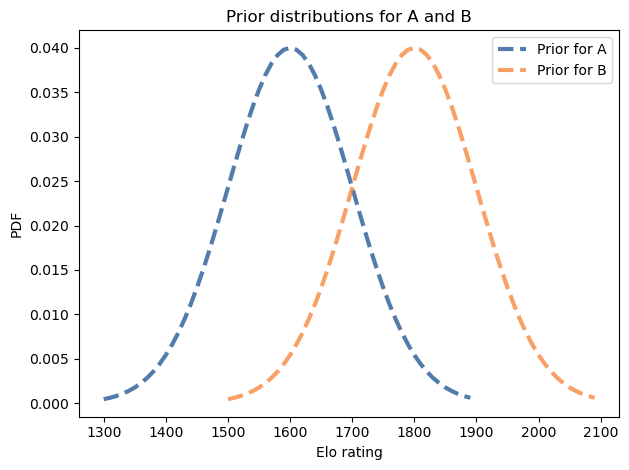

In [109]:
prior_A_elo.plot(style='--', label='Prior for A')
prior_B_elo.plot(style='--', label='Prior for B')

decorate(xlabel='Elo rating', ylabel='PDF', title='Prior distributions for A and B')

#### 2. 사전 분포가 독립적이라고 가정하고 이를 사용하여 결합 분포를 구성

In [110]:
joint_elo = make_joint(prior_A_elo, prior_B_elo)
joint_elo.shape

(60, 60)

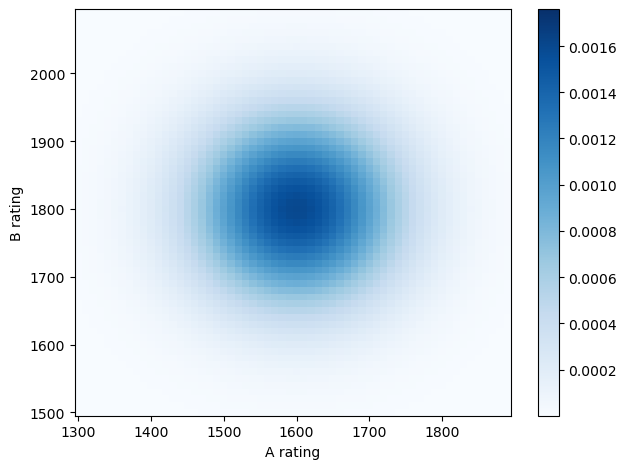

In [111]:
plot_joint(joint_elo)
decorate(xlabel='A rating', ylabel='B rating')

#### 3. 위의 로지스틱 함수를 사용하여 각 결합 가설에 따른 결과의 가능성을 계산


In [112]:
x = joint_elo.columns
y = joint_elo.index
X, Y = np.meshgrid(x, y)
diff = X - Y

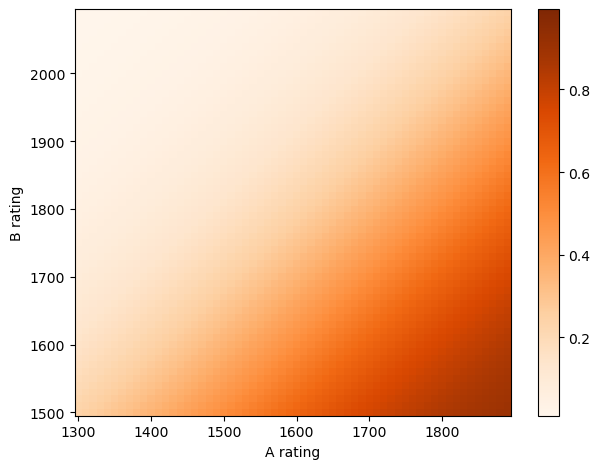

In [113]:
a = 1 / (1 + 10**(-diff/400))
likelihood_elo = pd.DataFrame(a, columns=x, index=y)

plot_joint(likelihood_elo, cmap='Oranges')   
decorate(xlabel='A rating', ylabel='B rating')


#### 4. 사전결합분포 및 가능도를 사용하여 사후결합분포를 생성

In [114]:
posterior_elo = joint_elo * likelihood_elo
normalize(posterior_elo)

0.2660426288107942

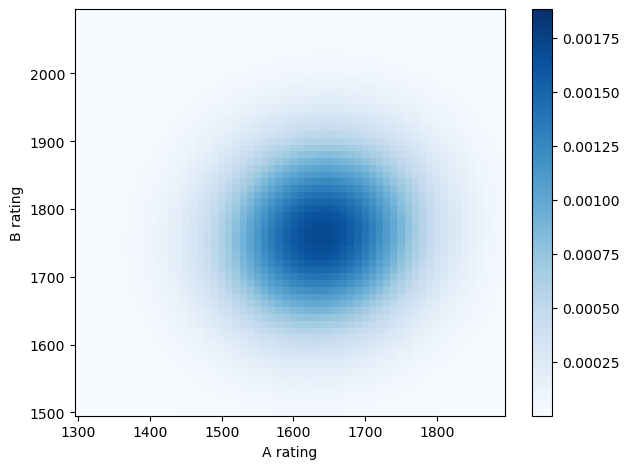

In [115]:
plot_joint(posterior_elo)   
decorate(xlabel='A rating', ylabel='B rating')

#### 5. 'A'와 'B'에 대한 사후주변분포를 생성하고 시각화

In [118]:
marginal_A_elo = marginal(posterior_elo, axis=0)
marginal_B_elo = marginal(posterior_elo, axis=1)

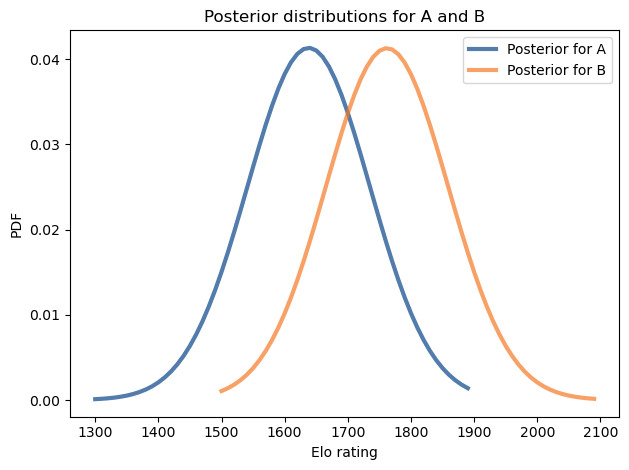

In [119]:
marginal_A_elo.plot(label='Posterior for A')
marginal_B_elo.plot(label='Posterior for B')

decorate(xlabel='Elo rating', ylabel='PDF', title='Posterior distributions for A and B')

#### 6. 'A'와 'B'에 대한 사후 평균을 계산 $\rightarrow$ 이 결과에 따라 점수를 갱신
- **A : 1600 $\rightarrow$ 1637**
- **B : 1800 $\rightarrow$ 1763**

In [120]:
marginal_A_elo.mean(), marginal_B_elo.mean()

(1636.648345528236, 1763.0203078793095)

In [121]:
marginal_A_elo.std(), marginal_B_elo.std()

(95.34063582447712, 95.61569535990881)